# Charts

* Authors: Manvitha Kuncham, Ramakrishna Reddy Loka, David Koop
* Last Updated: 2024-10-11

## Introduction

Data visualization is a field that concerns the representation and presentation of data in the visual form. Such visualizations can reveal patterns, trends, and relationships in data, and there are many important guidelines about how to best represent and communicate data. While custom visualizations can be eye-catching and memorable, there a number of standard chart types that are commonly used to visualize data. Sometimes these charts are also known as *plots* (e.g. line plots) or *graphs* (e.g. bar graphs). In this courselet, we will explore different types of charts using the matplotlib library.


## Python Data Visualization Libraries

To begin constructing data visualizations in python, we need to select a library to use to create the visualizations. There is a sprawling [landscape](https://pyviz.org/overviews/) of visualizaiton libraries in python. One of the oldest and most widely used is [matplotlib](https://matplotlib.org), and we will use that library for this courselet. However, there are a number of alternatives that may be useful depending on your needs, both in terms of types of charts and options, and for eventually deploying the visualizations. Some other popular charting libraries include:

* [seaborn](https://seaborn.pydata.org): seaborn is a library based on Matplotlib that provides high-level interface for creating informative and attractive statistical graphics. It provides additional functionality like . Seaborn provides high-level constructs to extend matplotlib functionality including heatmaps, violin plots, and factor plots.

* [Plotly](https://plotly.com/python/): Plotly is a library that allows you to create interactive and dynamic visualizations that can be embedded in web applications or dashboards. It provides a range of chart types and customization options, and allows you to create animations and interactive controls. Plotly is a good choice if you need to create web-based interactive visualizations.

* [Vega-Altair](https://altair-viz.github.io/): Vega-Altair is a library that allows you to create declarative visualizations that are based on a grammar of graphics. It provides a concise and intuitive syntax for creating charts, and allows you to easily customize the look and feel of your charts. Vega-Altair is a good choice if you want to create complex visualizations using a declarative, grammar-based approach.

## Installing the required libraries

In order to create charts in this courselet, it is necessary to install a suitable charting module. One of the most widely used charting libraries in Python is [matplotlib](https://matplotlib.org), which offers a variety of chart types and extensive customization options. To install matplotlib, run the following command in your Python environment:
```sh
pip install matplotlib
```
You can also use conda to install it with `conda install matplotlib`. While matplotlib supports building visualizations in a number of different ways, the most straightforward method is by using the `pyplot` interface. This is often imported as `plt`:

In [167]:
import matplotlib.pyplot as plt

## Datasets

For this courselet, we will be using the [Gapminder](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v2) data as persisted by [vega-datasets](https://github.com/vega/vega-datasets). Run the next cell to download this data and parse this data locally.

In [168]:
import os
from urllib.request import urlretrieve

url = "https://raw.githubusercontent.com/vega/vega-datasets/refs/heads/main/data/gapminder.json"
local_fname = "gapminder.json"
if not os.path.exists(local_fname):
    urlretrieve(url, local_fname)

In [169]:
import json
from collections import defaultdict
from collections.abc import Sequence
import itertools

data = json.load(open(local_fname))

data_by_country = defaultdict(list)
data_by_year = defaultdict(list)
data_by_country_year = defaultdict(list)
for d in data:
    data_by_country[d["country"]].append(d)
    data_by_year[d["year"]].append(d)
    data_by_country_year[(d["country"], d["year"])].append(d)
data_by_country = dict(data_by_country)
data_by_year = dict(data_by_year)
data_by_country_year = dict(data_by_country_year)


def get_data_with_fields(
    data_dict, fields, subset=None, flatten=False, as_arrays=True, fields_as_dict=False
):
    single_res = False
    if subset is None:
        subset = data_dict.keys()
    elif not isinstance(subset, Sequence) or isinstance(subset, str):
        subset = [subset]
        single_res = True

    def transform(x):
        return x

    if as_arrays:

        def transform(x):
            return list(zip(*x))

    if flatten:
        res = transform(
            sorted(tuple(d[f] for f in fields) for k in subset for d in data_dict[k])
        )
    else:
        res = {
            k: transform(sorted(tuple(d[f] for f in fields) for d in data_dict[k]))
            for k in subset
        }
    if not flatten and fields_as_dict:
        res = {k: {f: v for f, v in zip(fields, res[k])} for k in res}
    if not flatten and single_res:
        return res[subset[0]]
    return res


def get_country_data_with_fields(
    fields, countries=None, flatten=False, as_arrays=True, fields_as_dict=False
):
    return get_data_with_fields(
        data_by_country,
        fields,
        subset=countries,
        flatten=flatten,
        as_arrays=as_arrays,
        fields_as_dict=fields_as_dict,
    )


def get_year_data_with_fields(
    fields, years=None, flatten=False, as_arrays=True, fields_as_dict=False
):
    return get_data_with_fields(
        data_by_year,
        fields,
        subset=years,
        flatten=flatten,
        as_arrays=as_arrays,
        fields_as_dict=fields_as_dict,
    )


def get_country_year_data_with_fields(
    fields,
    countries=None,
    years=None,
    flatten=True,
    as_arrays=True,
    fields_as_dict=False,
):
    subset = list(itertools.product(countries, years))
    return get_data_with_fields(
        data_by_country_year,
        fields,
        subset,
        flatten=flatten,
        as_arrays=as_arrays,
        fields_as_dict=fields_as_dict,
    )


## Line Graph

A [line chart](https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py) is a chart that displays information as a series of data **points** connected by straight **lines**. Line charts can be used to show trends over time, and they are particularly useful for visualizing data that changes continuously. This is the default plot in matplotlib and therefore is constructed using the `plot` method. Here, we examine the life expectancy in the United States from 1955-2005. The data we start with is composed of two paired sequences, one for the years and another for the values.

In [171]:
# the data we are plotting
years, us_life_expect = get_country_data_with_fields(
    ["year", "life_expect"], "United States"
)
years, us_life_expect

((1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005),
 (69.86, 70.06, 70.37, 70.93, 72.73, 73.96, 74.91, 75.72, 76.08, 77.03, 77.73))

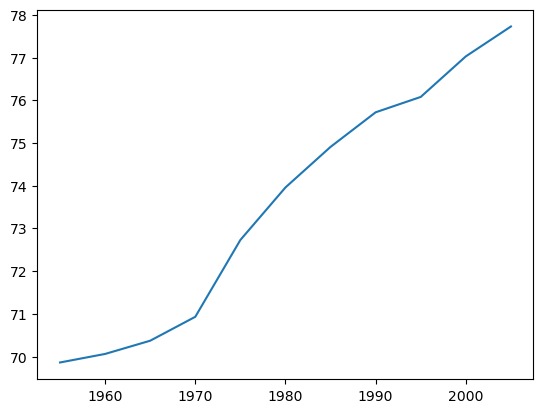

In [174]:
plt.plot(years, us_life_expect)

In older versions of Jupyter, and if you are running in a different environment, you may need to add `plt.show()` to show the plot. This would also clean up some of the extra text output shown above. However, it's generally not worth the keystrokes.

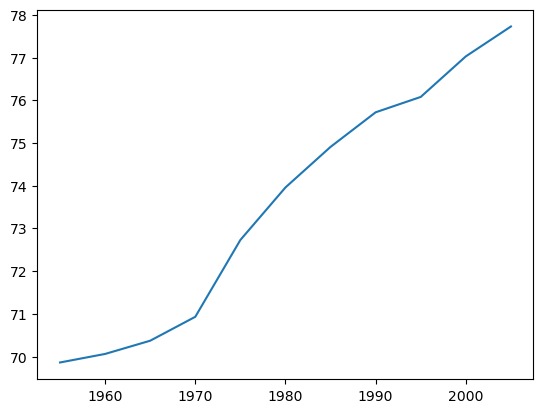

In [179]:
plt.plot(years, us_life_expect)
plt.show()

A line plot places points according to an x-position (left-to-right) which in our case represents the year and according to a y-position (bottom-to-top) which in our case represents the average life expectancy in that year. Those dots are connected by straight lines so we can see the trends over time. The implication of the line segements is that the values continuously change from one measurement to another.

Besides the line segments, the plot also shows two **axes**, the x-axis and the y-axis. The axes have **labeled tick marks** that help viewers read the values for a particular location along the line. Since we already know the data we are plotting, understanding the visualization is straightforward--we see a trend of increasing life expectancy over the years. However, suppose you were just shown this graph without that background information. We might guess that the x-axis shows years, but the y-axis could be any number of different measures.

## Adding Labels

Before publishing a line plot, we should label the axes in the graph and provide a title for the visualization. To add labels to the axes, we can use the `xlabel` and `ylabel` functions from matplotlib to label the horizontal and vertical axes, respectively. Finally, we can add `title` to the plot using the `title` function. You might notice that these are **stateful** functions, meaning that they update the plot we created using the `plot` method.

Text(0.5, 1.0, 'Life Expectancy in the United States')

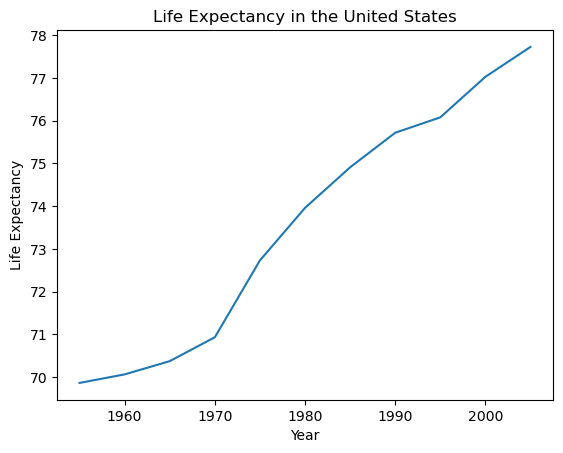

In [180]:
plt.plot(years, us_life_expect)

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

## Changing Plot Appearance

You may have noted that the line is draw in a blue color. That is matplotlib's default line color, but we can change it if we wish by modifying the `color` parameter.

Text(0.5, 1.0, 'Life Expectancy in the United States')

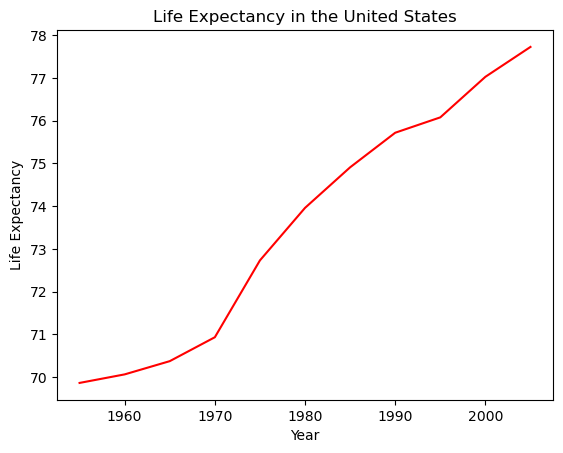

In [181]:
plt.plot(years, us_life_expect, color="red")

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

Similarly, we can change the line style using the linestyle parameter. The following code snippet changes the line style to a dashed line:

Text(0.5, 1.0, 'Life Expectancy in the United States')

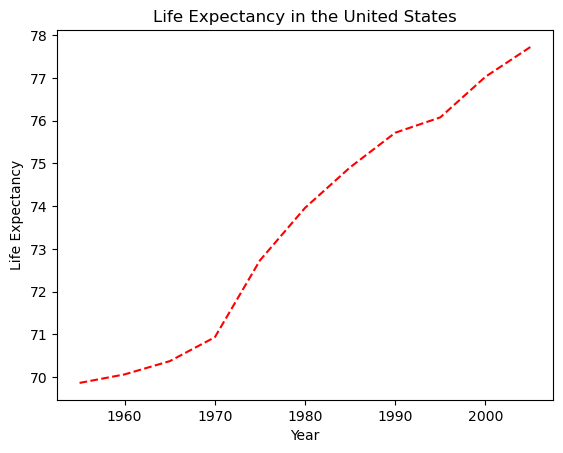

In [182]:
plt.plot(years, us_life_expect, color="red", linestyle="dashed")

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

Sometimes, it is useful to know the points that were used to create the line plot. This may be important in understanding how fine-grained the data is and how the values are distributed. For example, if the data had one measurement between 1955 and 1995 and ten measurements from 1995 to 2005, we may be missing subtle trends in the earlier time period. In matplotlib, we can change the `marker` type to emphasize the recorded points. In this case, `'o'` indicates that a circular marker should be used. The [documentation](https://matplotlib.org/stable/api/markers_api.html) provides the definitions of the available markers.

Text(0.5, 1.0, 'Life Expectancy in the United States')

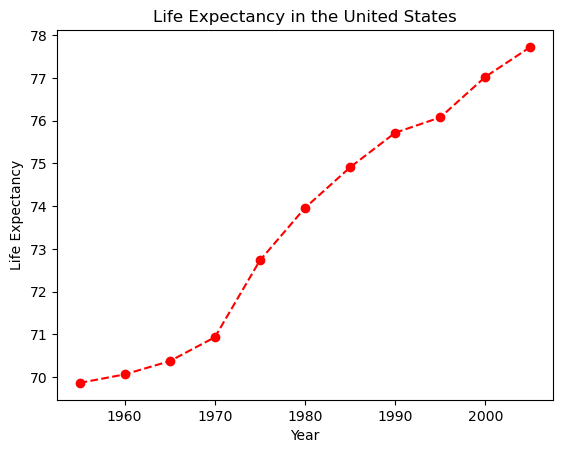

In [183]:
plt.plot(years, us_life_expect, color="red", linestyle="dashed", marker="o")

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

matplotlib has a shorthand available for specifying the marker, linestyle, and color settings for a plot. A **format string** is a string with components for each of these properties:
```python
fmt = f'{marker_str}{linestyle_str}{color_str}'
```
The [plot function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) contains a section detailing the settings for each of these strings. We can specify the dashed red plot with circular markers as 
`'o--r'` where `'o'` is the marker type, `'--'` is the dashed style, and `'r'` is the red color. Note that the possible strings are disjoint so (a) the order does not matter and (b) you can specify any subset of the strings. The format string `'o'` will show a plot without any lines and use the default blue color.

Text(0.5, 1.0, 'Life Expectancy in the United States')

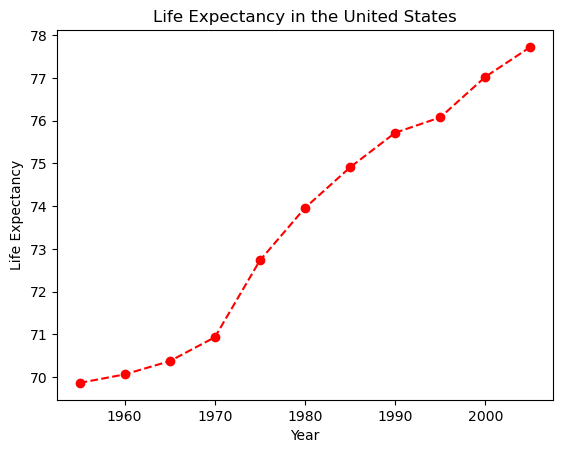

In [184]:
plt.plot(years, us_life_expect, "o--r")

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

### Excercise

In our example plot, change the marker type to a square, and the line style to dotted line style. Finally, keep the line color red but change the marker color to the black. Note that we have not discussed how to change the marker color only so search the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for plot function. Hint: Look at the kwargs parameters. 

### Solution

Text(0.5, 1.0, 'Life Expectancy in the United States')

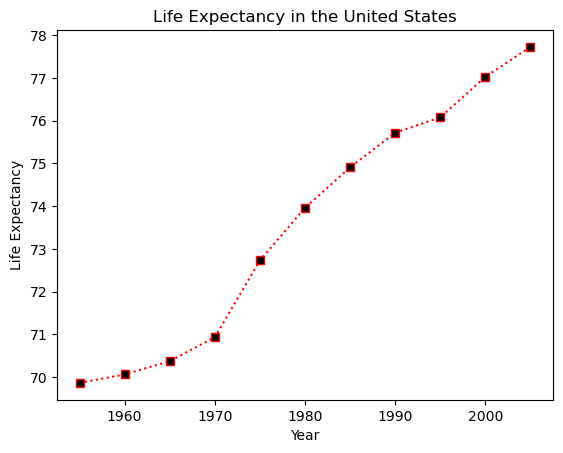

In [185]:
plt.plot(
    years,
    us_life_expect,
    marker="s",
    linestyle="dotted",
    markerfacecolor="black",
    color="red",
)

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

Alternatively, we could use a format string for most of the parameters:

Text(0.5, 1.0, 'Life Expectancy in the United States')

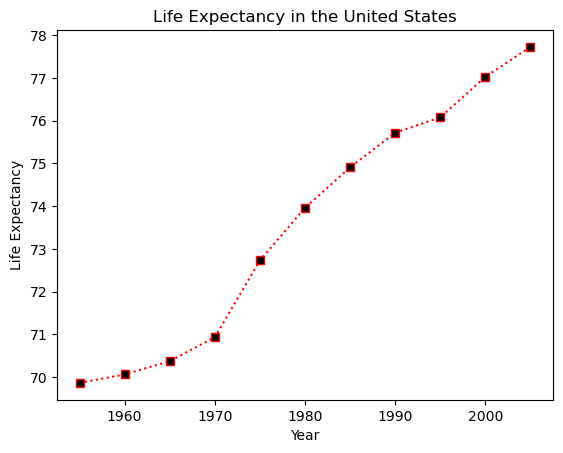

In [186]:
plt.plot(years, us_life_expect, "s:r", markerfacecolor="black")

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

### Multiple Lines

Suppose we wished to compare life expectancy across different countries. In order to do this, we need to plot multiple lines. One way of doing this is to simple add multiple calls to the plot method. Again, because matplotlib is stateful, all of these calls modify a single set of axes.

In [187]:
country_life_expect = get_country_data_with_fields(
    ["year", "life_expect"], ["United States", "China", "France", "Nigeria"]
)

Text(0.5, 1.0, 'Life Expectancy in Countries')

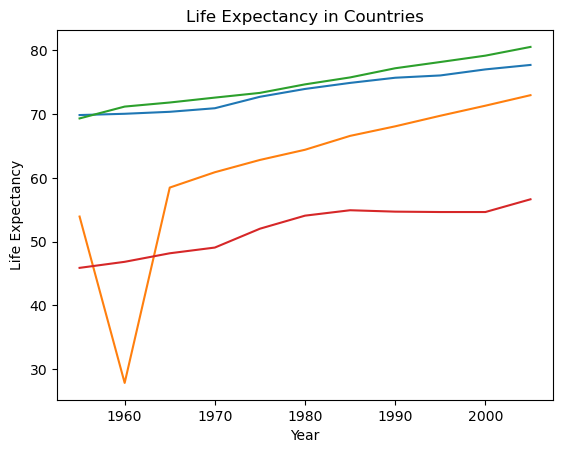

In [188]:
for country, (years, life_expect) in country_life_expect.items():
    plt.plot(years, life_expect)

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in Countries")

This looks interesting in that there are some potentially interesting trends here.  However, we do not know which countries are being shown!

### Legend

A **legend** provides the mapping from each color being shown to a label that helps a user understand the different lines. In our case, we want the legend to map from the color to the country name (stored in the variable `country`). matplotlib's `legend` function will do its best to create and place a legend box with this information so we can add this call.

/var/folders/4f/hdnf7bzs0ng2pg652ppm9sv80000gn/T/ipykernel_14023/3174126645.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Life Expectancy in Countries')

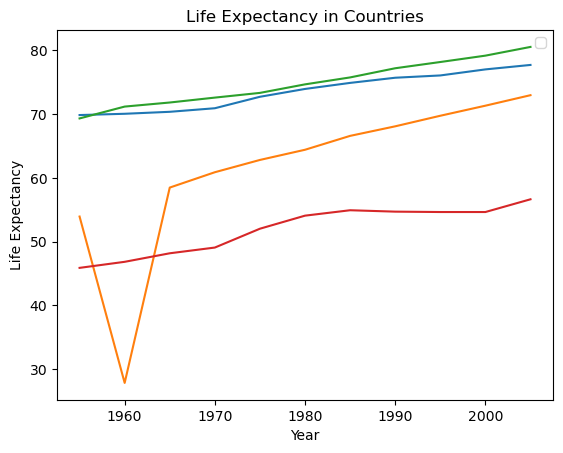

In [189]:
for country, (years, life_expect) in country_life_expect.items():
    plt.plot(years, life_expect)

plt.legend()

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in Countries")

This doesn't work, but that may not be a big surprise because nowhere did we tell matplotlib which country was associated with each line. The `plot` function has another keyword argument (kwarg) called `label` that will let us associate a label with the plot. This is used to produce the legend.

Text(0.5, 1.0, 'Life Expectancy in Countries')

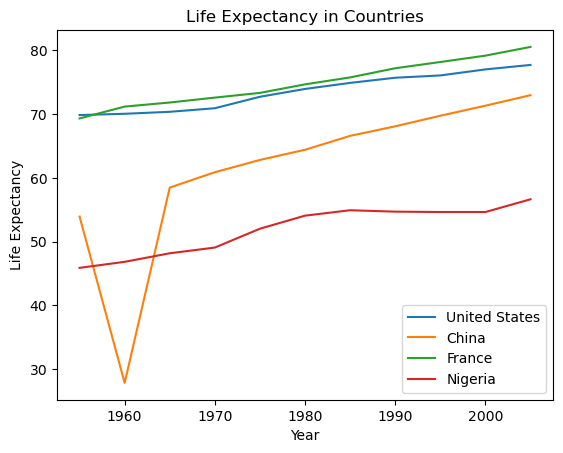

In [190]:
for country, (years, life_expect) in country_life_expect.items():
    plt.plot(years, life_expect, label=country)

plt.legend()

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in Countries")

## Scatterplots

We noted using a format string of `'o'` will show a plot **without** lines.

Text(0.5, 1.0, 'Life Expectancy in the United States')

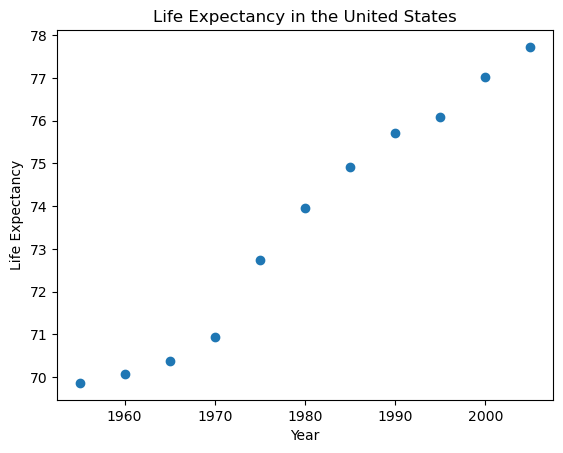

In [191]:
plt.plot(years, us_life_expect, "o")

# Labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in the United States")

Technically, this is **dot plot** beacuse there is only one entry per year. If we wanted to examine life expectancy versus income for each country, we could instead produce a scatterplot as two countries might have the same values for one or both axes.

In [192]:
data2005 = get_year_data_with_fields(
    ["country", "life_expect", "pop", "cluster", "fertility"], 2005, fields_as_dict=True
)

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

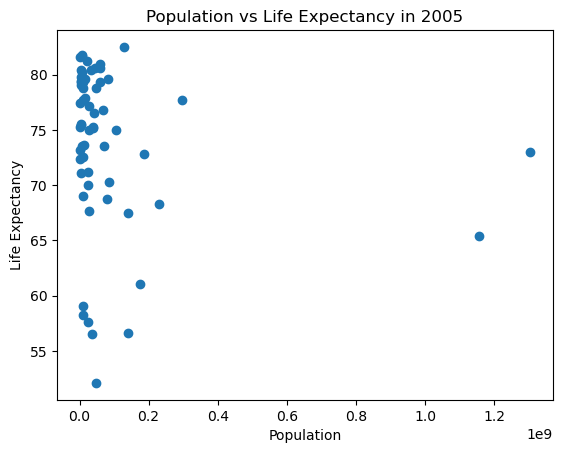

In [193]:
plt.plot(data2005["pop"], data2005["life_expect"], "o")

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")

Because China and India's populations dwarfed other countries, this plot clusters most of the points on the left side. We can change this by using **log scaling** on the x-axis.

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

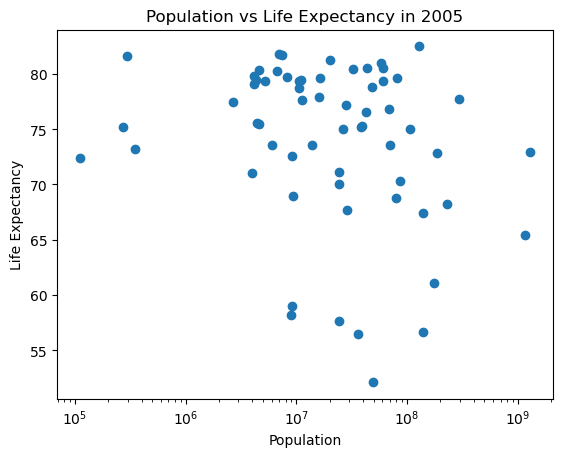

In [194]:
plt.semilogx(data2005["pop"], data2005["life_expect"], "o")

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")

Alternatively, pyplot also has a `scatter` method that can be used here.

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

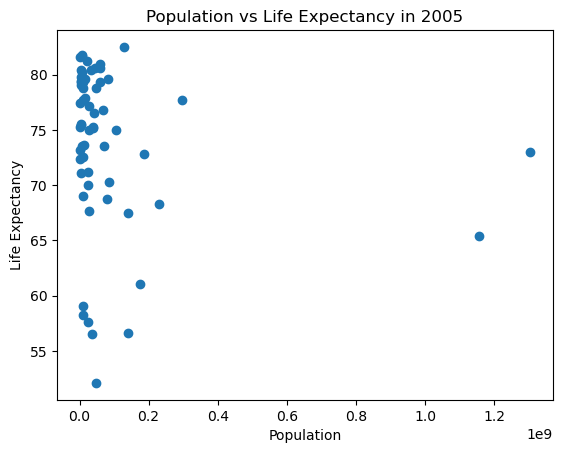

In [195]:
plt.scatter(data2005["pop"], data2005["life_expect"])

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

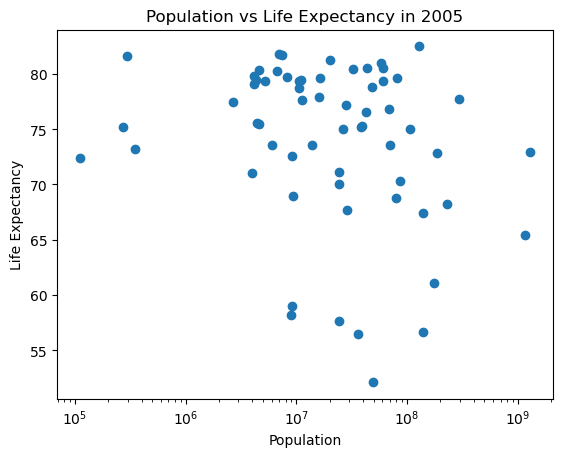

In [196]:
plt.scatter(data2005["pop"], data2005["life_expect"])
plt.xscale("log")

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")

This is interesting, but we may be able to see other differences if we know something about the regions where these countries are located in. To do, we might wish to add color. We can do this by adding the `c` argument to `scatter`.

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

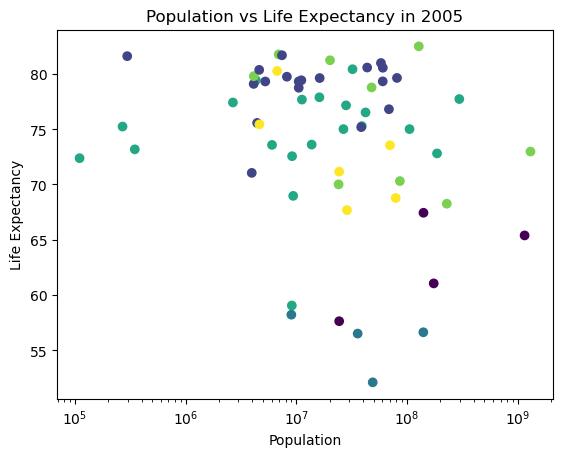

In [197]:
plt.scatter(data2005["pop"], data2005["life_expect"], c=data2005["cluster"])
plt.xscale("log")

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")

By default, matplotlib uses the [viridis colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html). This colormap works well when there is an **order** to the regions, but in our cases, we don't have an order, just different parts of the world (Americas, Africa, Europe, South Asia, Oceania & East Asia, Middle East). Thus, we should use a colormap that doesn't connote an order. matplotlib has some [documentation](https://matplotlib.org/stable/users/explain/colors/colormaps.html) explaining different types of colormaps, and we will use one of the [qualitative](https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative) colormaps. Since there are ten colors in the `tab10` colormap, we will recreate it for only the values from 0 to 5. We can also add a legend to associate the cluster value with each color using [`legend_elements`](https://matplotlib.org/stable/api/collections_api.html#matplotlib.collections.PathCollection.legend_elements).

In [198]:
from matplotlib.colors import ListedColormap

scatter_cmap = ListedColormap(plt.colormaps["tab10"].colors, N=6)

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

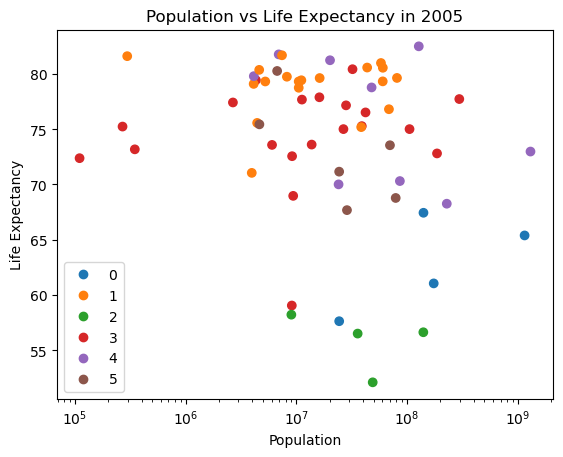

In [199]:
scatter = plt.scatter(
    data2005["pop"], data2005["life_expect"], c=data2005["cluster"], cmap=scatter_cmap
)
plt.xscale("log")

plt.legend(*scatter.legend_elements())

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")


If we have information about the regions themselves, we can add this as text by specifying it as the second parameter to the legend function.

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

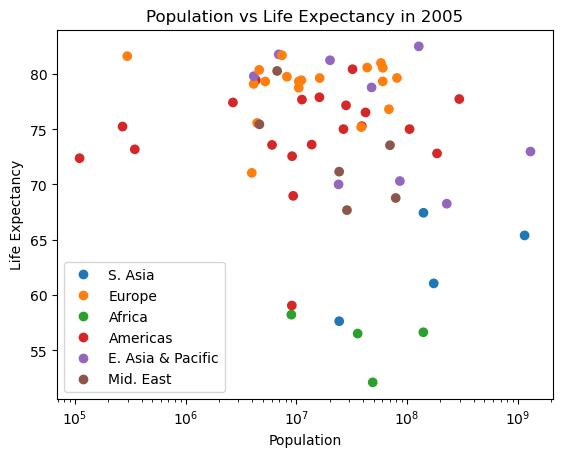

In [200]:
scatter = plt.scatter(
    data2005["pop"], data2005["life_expect"], c=data2005["cluster"], cmap=scatter_cmap
)
plt.xscale("log")

plt.legend(
    scatter.legend_elements()[0],
    ["S. Asia", "Europe", "Africa", "Americas", "E. Asia & Pacific", "Mid. East"],
)

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")


### Size

Finally, we could add information about fertility to the visualization using the size of the markers. This is done via the `s` argument. We may have to scale the values here to obtain the view that allows viewers to distinguish between different rates. here, we multiple by 25. This type of scatterplot is sometimes called a **bubble chart**. 

Text(0.5, 1.0, 'Population vs Life Expectancy in 2005')

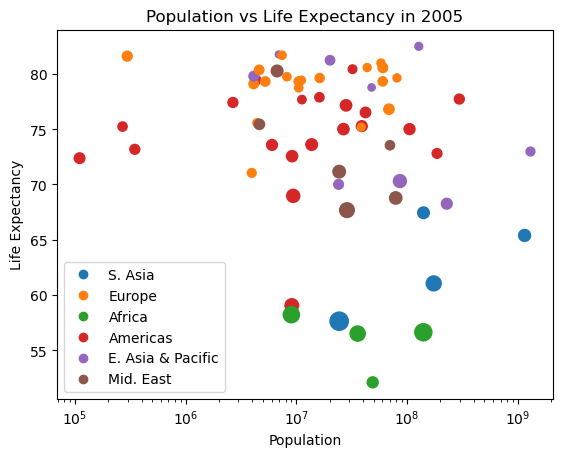

In [201]:
scatter = plt.scatter(
    data2005["pop"],
    data2005["life_expect"],
    c=data2005["cluster"],
    s=[d * 25 for d in data2005["fertility"]],
    cmap=scatter_cmap,
)
plt.xscale("log")

plt.legend(
    scatter.legend_elements()[0],
    ["S. Asia", "Europe", "Africa", "Americas", "E. Asia & Pacific", "Mid. East"],
)

# Labels
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Population vs Life Expectancy in 2005")


### Exercise

In some cases, relationships like correlation are clearer when we plot the correlated variables by x- and y- position. Modify the plot to plot `fertility2005` against `life_expect2005` and size by population. You may need to experiment to find a good scaling factor. Also, consider whether the log scale for the x-axis is a good idea.

### Solution

Text(0.5, 1.0, 'Fertility vs Life Expectancy in 2005')

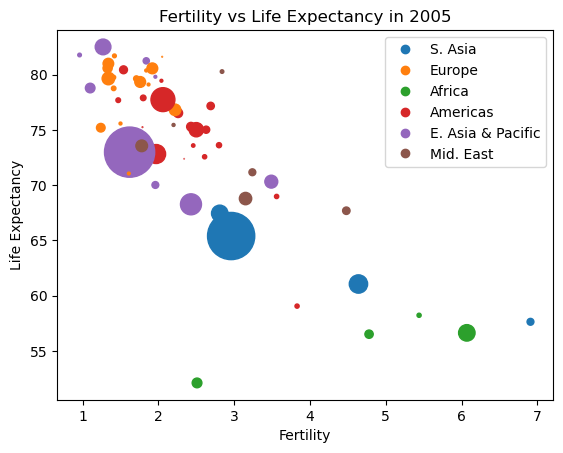

In [202]:
scatter = plt.scatter(
    data2005["fertility"],
    data2005["life_expect"],
    c=data2005["cluster"],
    s=[d / 1e6 for d in data2005["pop"]],
    cmap=scatter_cmap,
)

plt.legend(
    scatter.legend_elements()[0],
    ["S. Asia", "Europe", "Africa", "Americas", "E. Asia & Pacific", "Mid. East"],
)

# Labels
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.title("Fertility vs Life Expectancy in 2005")


### Facets

Our plots only show the data for 2005. It might be interesting to compare the scatterplots for different years, say 1960, 1975, 1990, and 2005. Here, we could create four different plots within the same visualization.

In [203]:
facet_data = get_year_data_with_fields(
    ["country", "life_expect", "pop", "cluster", "fertility"],
    [1960, 1975, 1990, 2005],
    fields_as_dict=True,
)

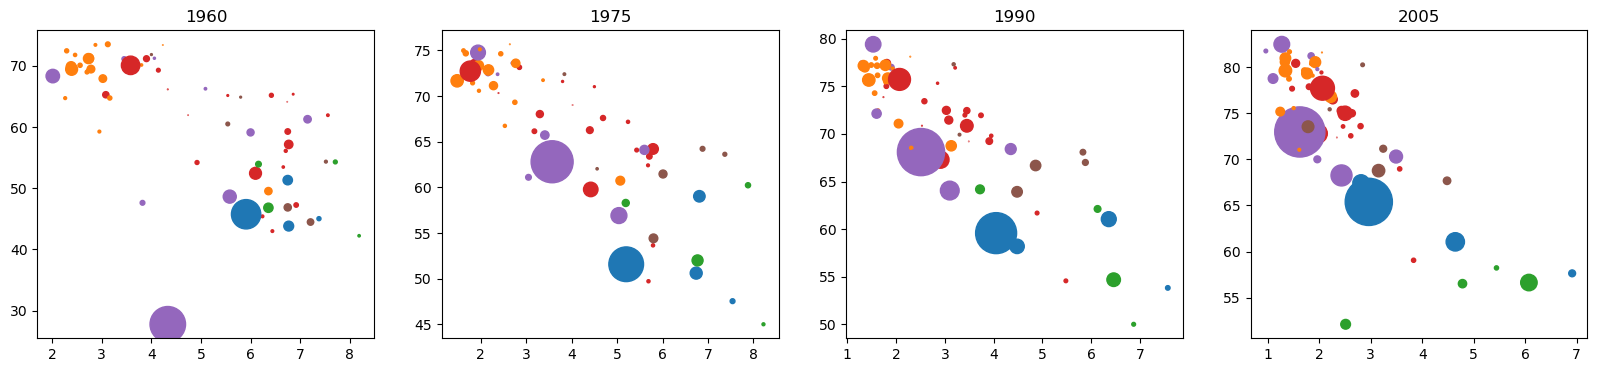

In [204]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for ax, (yr, yr_data) in zip(axes.flatten(), facet_data.items()):
    ax.scatter(
        yr_data["fertility"],
        yr_data["life_expect"],
        c=yr_data["cluster"],
        s=[d / 1e6 for d in yr_data["pop"]],
        cmap=scatter_cmap,
    )
    ax.set_title(yr)

One problem here is that each plot ahas its own axes so the plots are at different scales. We can set the `sharex` and `sharey` flags to fix this, and add proper labels and a legend.

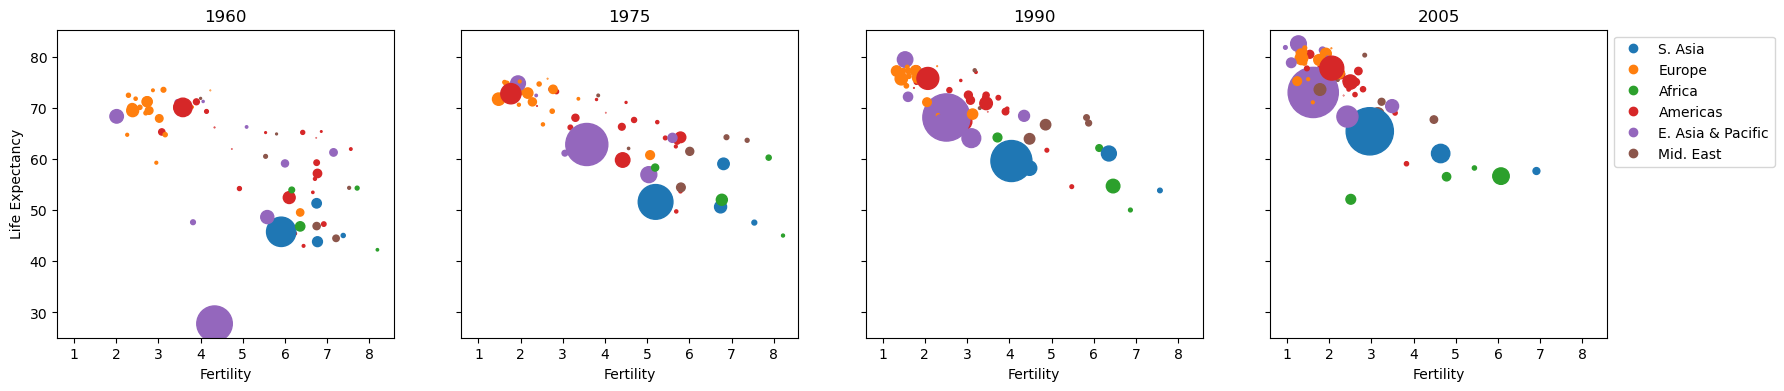

In [205]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)

for ax, (yr, yr_data) in zip(axes.flatten(), facet_data.items()):
    ax.scatter(
        yr_data["fertility"],
        yr_data["life_expect"],
        c=yr_data["cluster"],
        s=[d / 1e6 for d in yr_data["pop"]],
        cmap=scatter_cmap,
    )
    ax.set_title(yr)
    ax.set_xlabel("Fertility")
    if yr == 1960:  # only set for the far left axes
        ax.set_ylabel("Life Expectancy")

plt.legend(
    scatter.legend_elements()[0],
    ["S. Asia", "Europe", "Africa", "Americas", "E. Asia & Pacific", "Mid. East"],
    bbox_to_anchor=(1, 1),
)


## Bar Chart

A **bar chart** is a chart that uses bars to represent values. The bars can be horizontal or vertical, and the length of each bar encodes the value. Bar charts are commonly used to compare different categories. Here, we have a list of countries and their populations in 2005:

In [206]:
countries = ("Australia", "China", "France", "India", "Nigeria", "United States")
bar_countries, bar_pop2005 = get_country_year_data_with_fields(
    ["country", "pop"], countries, [2005], as_arrays=True
)

We plot these using matplotlib's `bar` function, passing the countries as the bar labels, and the populations as the values.

<BarContainer object of 6 artists>

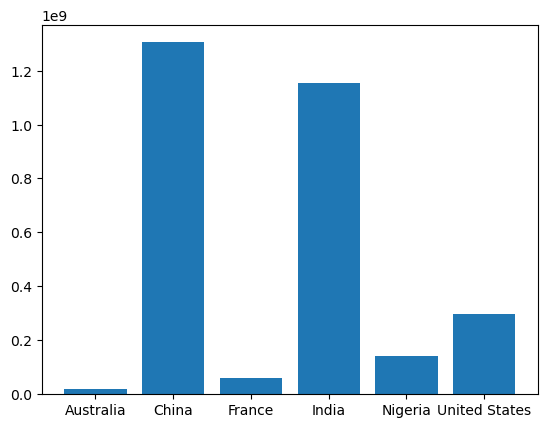

In [207]:
plt.bar(bar_countries, bar_pop2005)

As with other charts, a title for the plot and labels for the axes are important, and we can add these as with the other plots.

Text(0.5, 1.0, 'Population in 2005')

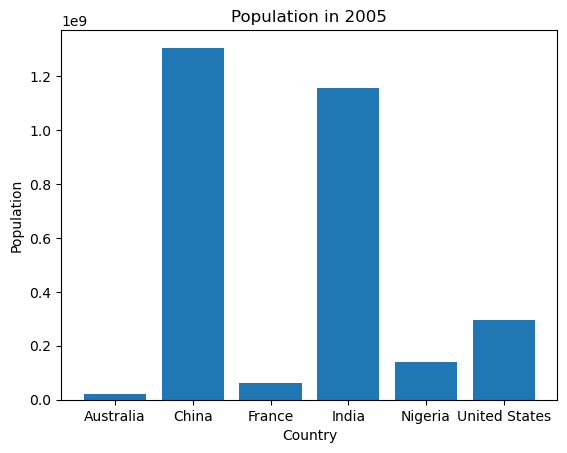

In [208]:
plt.bar(bar_countries, bar_pop2005)

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

We can also create a horizontal bar chart by using the `barh` function in place of the `bar` function.

Text(0.5, 1.0, 'Population in 2005')

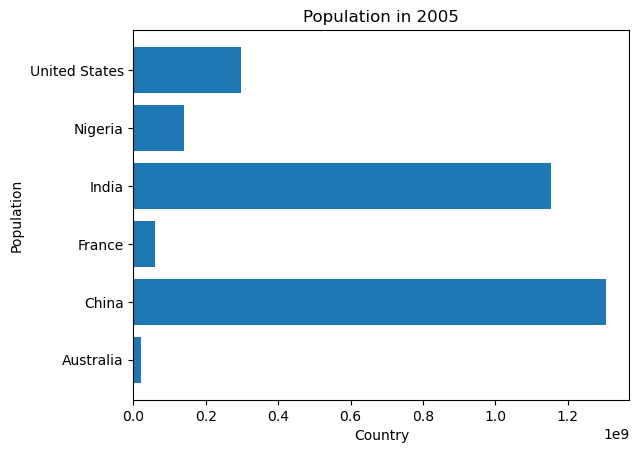

In [209]:
plt.barh(bar_countries, bar_pop2005)

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

These countries are currently shown in alphabetical order which can be useful for looking up a particular country's population, especially if there are many countries. However, we could also sort the bars by their population which makes comparing the values easier.

Text(0.5, 1.0, 'Population in 2005')

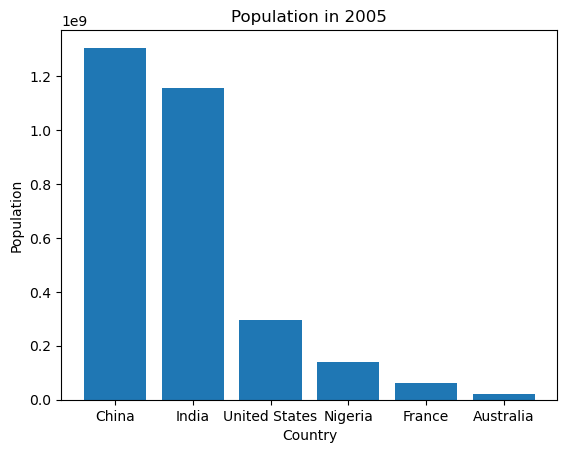

In [210]:
sorted_pop, sorted_countries = zip(
    *sorted(zip(bar_pop2005, bar_countries), reverse=True)
)
plt.bar(sorted_countries, sorted_pop)

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

### Changing the Appearance

As with other plots, we can change the appearance of the bars using different parameters, including one to change the color of the bars.

Text(0.5, 1.0, 'Population in 2005')

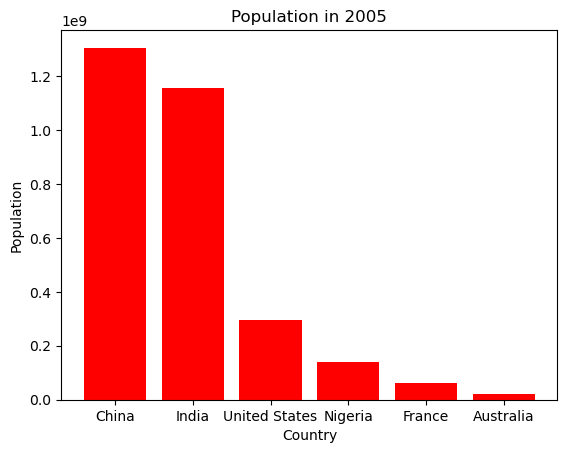

In [211]:
sorted_pop, sorted_countries = zip(
    *sorted(zip(bar_pop2005, bar_countries), reverse=True)
)
plt.bar(sorted_countries, sorted_pop, color="red")

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

We can also choose to include grid marks and where to place them. When bars are far from the y-axis, it can be difficult to read the values for a particular bar. In our example, we might wonder whether the United States had over 250 million people in 2005. By drawing grid lines at 0.25, 0.50, 0.75, 1 and 1.25 billion using `yticks` and `grid`, we can more easily see that indeed, it did.

Text(0.5, 1.0, 'Population in 2005')

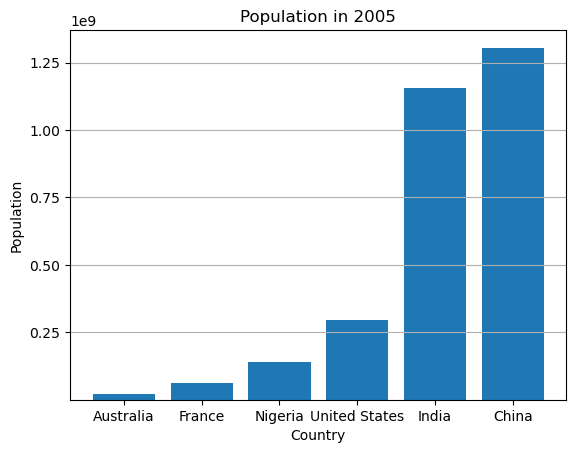

In [212]:
sorted_pop, sorted_countries = zip(
    *sorted(zip(bar_pop2005, bar_countries), reverse=False)
)
plt.bar(sorted_countries, sorted_pop)
plt.yticks([25e7, 50e7, 75e7, 100e7, 125e7])
plt.grid(axis="y")

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

In some cases, these lines may be distracting. We could choose to use a white color so that they fade into the background but "cut" the bars to help with value judgments.

Text(0.5, 1.0, 'Population in 2005')

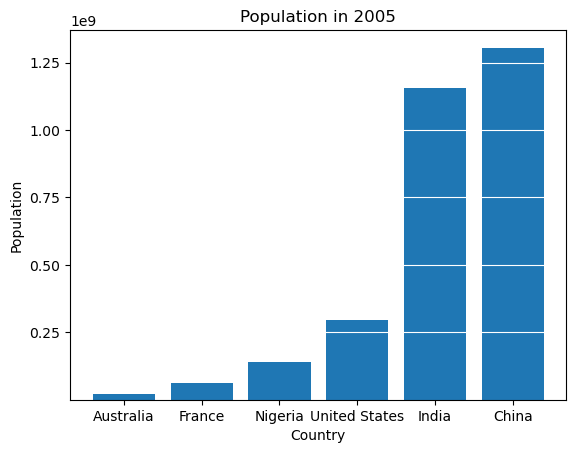

In [213]:
sorted_pop, sorted_countries = zip(
    *sorted(zip(bar_pop2005, bar_countries), reverse=False)
)
plt.bar(sorted_countries, sorted_pop)
plt.yticks([25e7, 50e7, 75e7, 100e7, 125e7])
plt.grid(axis="y", color="w")

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

### Stacked Bar Charts

If we wish to observe both how the population grew over the decades as well as the individual populations of each country, we can use a **stacked bar chart**. This splits each bar into individual segments corresponding to the individual values that sum to the total.

In [214]:
countries = ["Australia", "China", "France", "India", "Nigeria", "United States"]
stacked_countries = get_country_data_with_fields(
    ["year", "pop"],
    countries,
)

Text(0.5, 1.0, 'Stacked Populations')

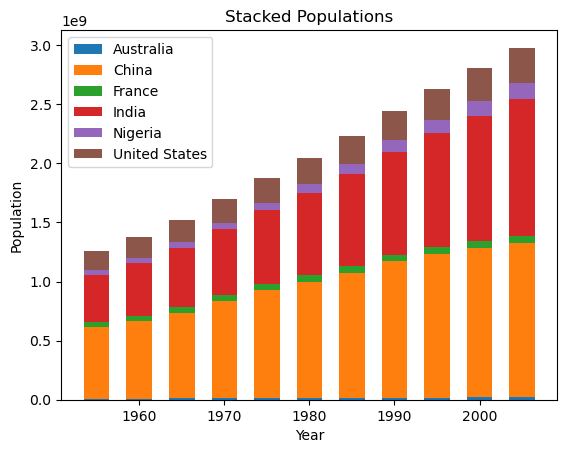

In [215]:
import numpy as np

num_years = len(next(iter(stacked_countries.values()))[0])
bottom = np.zeros(num_years)
for country, (years, pop) in stacked_countries.items():
    plt.bar(years, pop, label=country, width=3, bottom=bottom)
    bottom += np.array(pop)

plt.legend()

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Stacked Populations")

Generally, we want to order the stack so that the largest bar segments are on the bottom. We can do this by sorting our countries based on their population in the latest year (2005).

Text(0.5, 1.0, 'Stacked Populations')

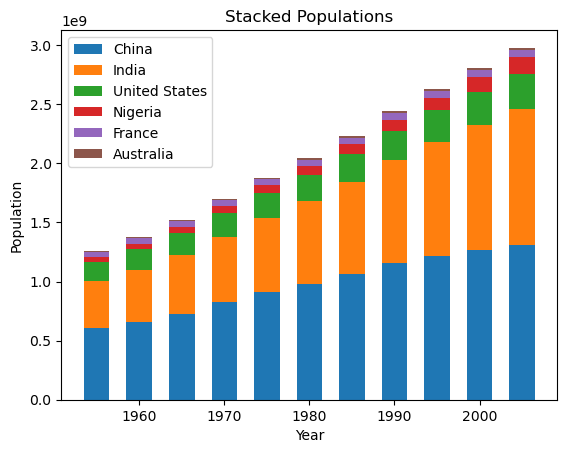

In [216]:
import numpy as np

num_years = len(next(iter(stacked_countries.values()))[0])
bottom = np.zeros(num_years)

sorted_countries = sorted(
    stacked_countries.items(), key=lambda x: x[1][1][-1], reverse=True
)
for country, (years, pop) in sorted_countries:
    plt.bar(years, pop, label=country, width=3, bottom=bottom)
    bottom += np.array(pop)

plt.legend()

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Stacked Populations")

### Grouped Bar Charts

Instead of stacking, a grouped bar chart order places all bars next to each but groups them to allow better intra-group comparisons. For example, it may not be clear in the stacked bar chart whether France or Nigeria has a greater population in the 1970s, but if we place them next to each other, we can more easily see this.

This is a bit tricky to accomplish in matplotlib, and other libraries like seaborn provide easier methods to construct these plots. In matplotlib, we construct $n$ different bar charts and **offset** from each other by exactly the correct width so that they appear next to each other. Thus, the calculation `years - (num_countries / 2 - i) * width` calculates the offsets from the original years to the left and right.

In [217]:
grouped_countries = {
    k: tuple([v for i, v in enumerate(vlist) if i % 3 == 0] for vlist in flist)
    for k, flist in stacked_countries.items()
}

Text(0.5, 1.0, 'Grouped Populations')

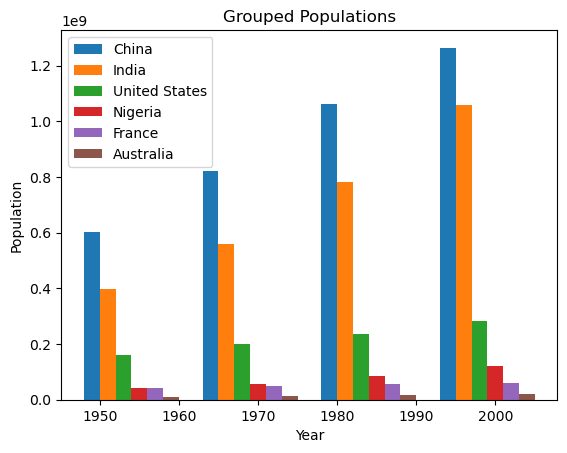

In [218]:
import numpy as np

years = np.array(next(iter(grouped_countries.values()))[0])
num_years = len(years)
num_countries = len(grouped_countries)
width = 2

sorted_countries = sorted(
    grouped_countries.items(), key=lambda x: x[1][1][-1], reverse=True
)
for i, (country, (all_years, all_pop)) in enumerate(sorted_countries):
    pop = [pop for year, pop in zip(all_years, all_pop) if year in years]
    plt.bar(years - (num_countries / 2 - i) * width, pop, label=country, width=width)

plt.legend()

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Grouped Populations")

The only problem here is that our tick marks do not align with the actual years we plotted. We can fix this by setting the `xticks` to be the years themselves.

Text(0.5, 1.0, 'Grouped Populations')

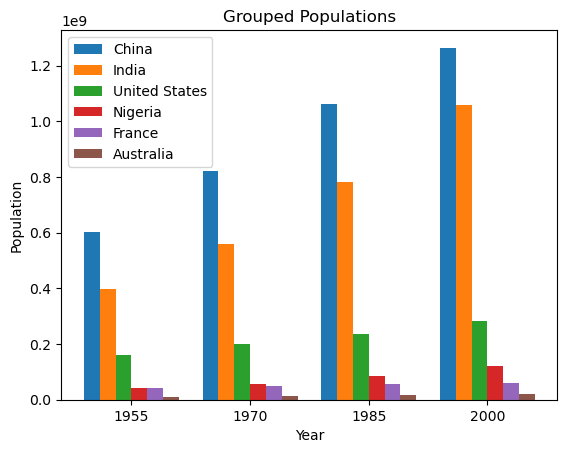

In [219]:
for i, (country, (all_years, all_pop)) in enumerate(sorted_countries):
    pop = [pop for year, pop in zip(all_years, all_pop) if year in years]
    plt.bar(
        years - ((num_countries - 1) / 2 - i) * width, pop, label=country, width=width
    )

plt.legend()

plt.xticks(years)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Grouped Populations")

## Pie Chart

A pie chart displays quantitative data where each item is a part of the whole. In our data, if we had the populations of all of the world's countries for 2005 (we don't, more on this later), we could plot each country's population as a slice of the pie. This would help us understand, for example, the percentage of people in the world that live in the United States. matplotlib has a `pie` function that takes a list of quantitative values and creates pie slices according to those values.

Text(0.5, 1.0, 'Population in 2005')

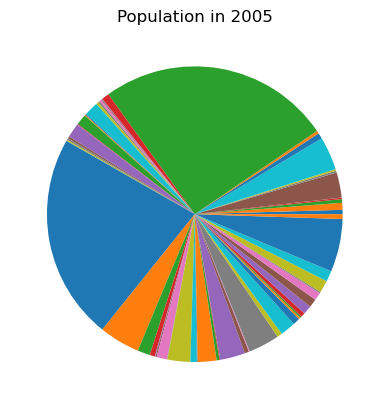

In [220]:
plt.pie(data2005["pop"])

plt.title("Population in 2005")

This clearly does not work very well because there are no labels identifying the different countries. We could add a legend. In this case we anchor the legend to the upper-right (1,1) of the figure to expand the width to fit the legend. This produces the following plot:

Text(0.5, 1.0, 'Population in 2005')

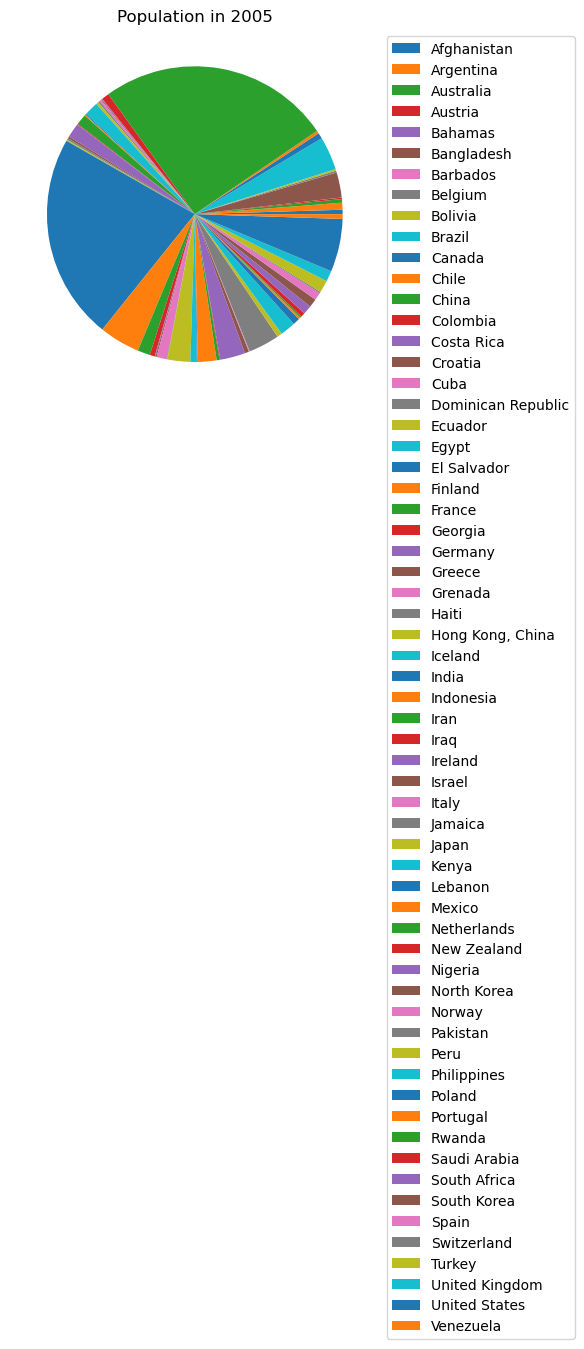

In [221]:
plt.pie(data2005["pop"])
plt.legend(data2005["country"], bbox_to_anchor=(1, 1))

# Add title
plt.title("Population in 2005")

Beyond being too big, the colors start repeating so we cannot distinguish between the countries. Afghanistan and Canada, for example, are the same color. We could use the `pie` function labels to help instead:

Text(0.5, 1.0, 'Population in 2005')

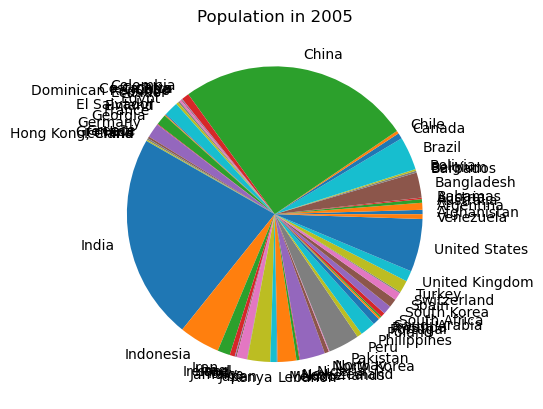

In [222]:
plt.pie(data2005["pop"], labels=data2005["country"])

# Add title
plt.title("Population in 2005")

This leads to issues where the labels are illegible for many countries. We could **sort** the countries so that they ordered by population instead of alphabetically.

Text(0.5, 1.0, 'Population in 2005')

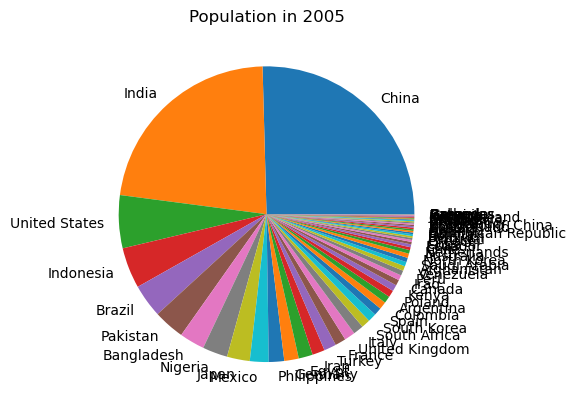

In [223]:
sorted_pop2005, sorted_countries2005 = zip(
    *sorted(zip(data2005["pop"], data2005["country"]), reverse=True)
)
plt.pie(sorted_pop2005, labels=sorted_countries2005)

# Add title
plt.title("Population in 2005")

This gives more legible labels but still leaves a number of countries with labels that cannot be read. A key issue with the visualization is that there are **too many** pieces of the pie so they cannot be distinguihed or labels. We might instead organize the chart to show the regions of the world by population instead.

Text(0.5, 1.0, 'Population by Region in 2005')

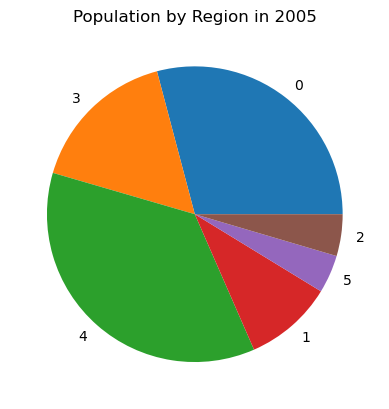

In [224]:
cluster_pops = {}
for pop, cluster in zip(data2005["pop"], data2005["cluster"]):
    cluster_pops[cluster] = cluster_pops.get(cluster, 0) + pop

cluster_names2005, cluster_pop2005 = zip(*cluster_pops.items())

plt.pie(cluster_pop2005, labels=cluster_names2005)

# Add title
plt.title("Population by Region in 2005")

matplotlib also allows some effects like `explode` to separate a slice from the rest of the pie. We specify the amount of separation for each slice as a percentage of the length of the radius. 

Text(0.5, 1.0, 'Population by Region in 2005')

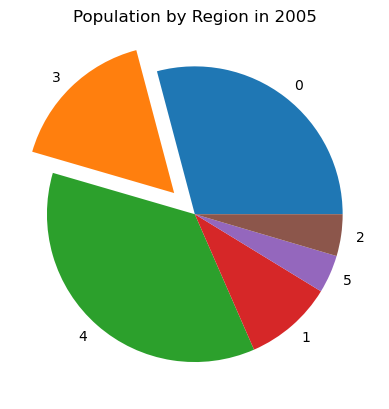

In [225]:
plt.pie(cluster_pop2005, labels=cluster_names2005, explode=[0, 0.2, 0, 0, 0, 0])

# Add title
plt.title("Population by Region in 2005")

We can also create a donut chart by shrinking the width of the slices:

Text(0.5, 1.0, 'Population by Region in 2005')

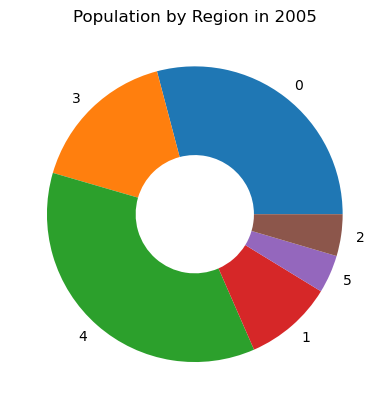

In [226]:
plt.pie(cluster_pop2005, labels=cluster_names2005, wedgeprops={"width": 0.6})

# Add title
plt.title("Population by Region in 2005")

### Sunburst

We could also show the individual countries by breaking each region into another level of the donut chart. This is known as a sunburst visualization, although is also called a nested pie chart. Here, we might choose to label only those countries that had populations above 100 million people.

Text(0.5, 1.0, 'Population by Region in 2005')

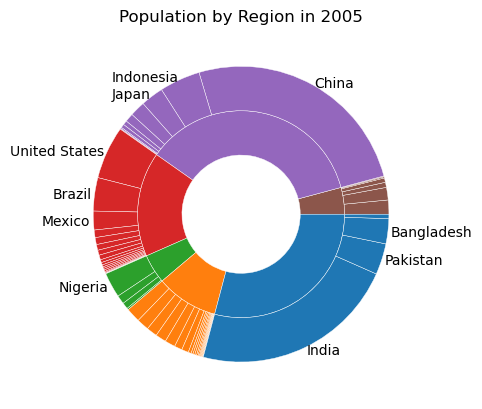

In [227]:
sorted_cluster2005, sorted_pop2005, sorted_countries2005 = zip(
    *sorted(
        zip(data2005["cluster"], data2005["pop"], data2005["country"]), reverse=True
    )
)
cluster_range = list(range(max(sorted_cluster2005), min(sorted_cluster2005) - 1, -1))
sorted_cluster_pops = [cluster_pops[c] for c in cluster_range]

cmap = plt.colormaps["tab10"]
outer_colors = cmap(cluster_range)
inner_colors = cmap(sorted_cluster2005)

country_labels = [
    n if pop > 1e8 else "" for n, pop in zip(sorted_countries2005, sorted_pop2005)
]

plt.pie(
    sorted_cluster_pops,
    colors=outer_colors,
    radius=0.7,
    wedgeprops={"width": 0.3, "edgecolor": "w", "linewidth": 0.3, "linestyle": "solid"},
)
plt.pie(
    sorted_pop2005,
    colors=inner_colors,
    labels=country_labels,
    labeldistance=1.02,
    wedgeprops={"width": 0.3, "edgecolor": "w", "linewidth": 0.3, "linestyle": "solid"},
)

# Add title
plt.title("Population by Region in 2005")

Generally, for a pie chart to be useful, we are interested in the **part of whole** relationships. Therefore, the sum of all the parts of the pie should match the total. Our dataset is **not** complete as some countries are not represented in it. Thus, making judgments about how much of the world's population is in, for example, the Americas may not be valid in this pie chart. Furthermore, if our question is about whether region 2 or 5 have a larger population, we would be better off using a bar chart since this is not a question that depends on the part of whole judgment.

Text(0.5, 1.0, 'Population by Region in 2005')

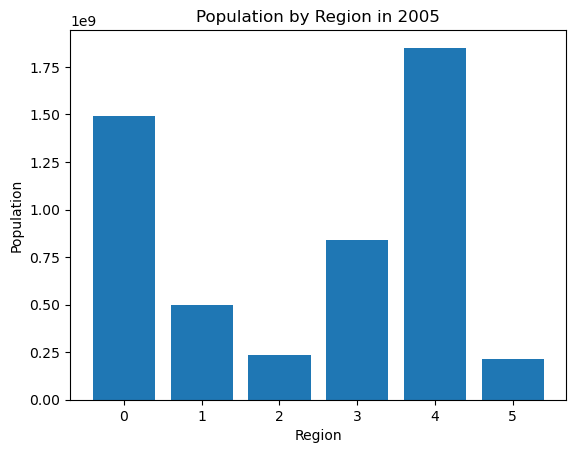

In [228]:
plt.bar(cluster_names2005, cluster_pop2005)

plt.xlabel("Region")
plt.ylabel("Population")
plt.title("Population by Region in 2005")

## Using Data Frames

Data frames are a data structure for representing tabular data, and are used by many data analysis libraries in Python, including [pandas](https://pandas.pydata.org) and [polars](https://pola.rs). Data visualizations can be generated using matplotlib or from the tools directly. For this section, we will use polars and pandas which you may need to install before continuing. If you are using `pip`, you can install these as `pip install polars pandas`, and with `conda`, you can use `conda install polars pandas`.

### matplotlib

matplotlib supports the `data` keyword argument for most plots. When used, this allows specification of the values for x, y, etc. as **column names** of the data frames.

In [229]:
import polars as pl

df = pl.read_json(local_fname)

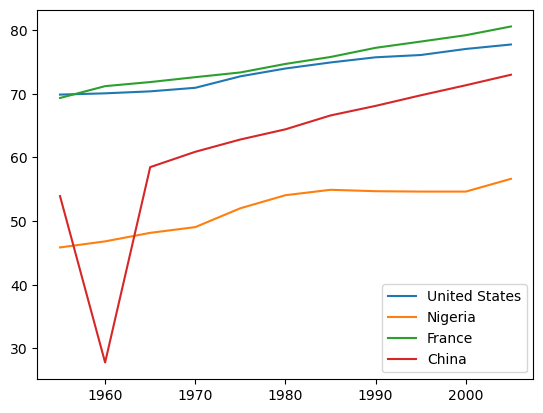

In [230]:
import matplotlib.pyplot as plt

countries = ["United States", "China", "France", "Nigeria"]
for country, gdf in df.filter(pl.col("country").is_in(countries)).group_by("country"):
    plt.plot("year", "life_expect", data=gdf, label=country)
plt.legend()

Text(0.5, 1.0, 'Fertility vs Life Expectancy in 2005')

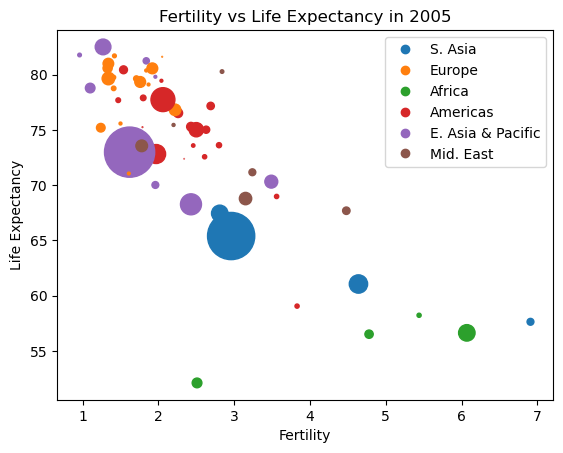

In [231]:
from matplotlib.colors import ListedColormap

scatter_cmap = ListedColormap(plt.colormaps["tab10"].colors, N=6)

df2005_scaled = df.filter(pl.col("year") == 2005).with_columns(pl.col("pop") / 1e6)

scatter = plt.scatter(
    "fertility",
    "life_expect",
    c="cluster",
    s="pop",
    data=df2005_scaled,
    cmap=scatter_cmap,
)

plt.legend(
    scatter.legend_elements()[0],
    ["S. Asia", "Europe", "Africa", "Americas", "E. Asia & Pacific", "Mid. East"],
)

# Labels
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.title("Fertility vs Life Expectancy in 2005")


Text(0.5, 1.0, 'Population in 2005')

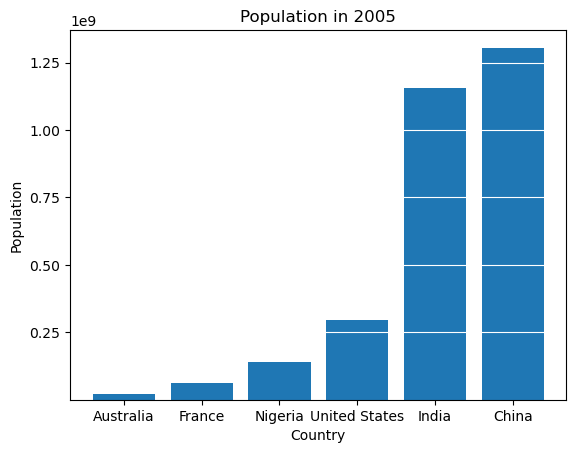

In [232]:
sorted_df = df.filter(
    (pl.col("year") == 2005) & pl.col("country").is_in(bar_countries)
).sort("pop")
plt.bar("country", "pop", data=sorted_df)
plt.yticks([25e7, 50e7, 75e7, 100e7, 125e7])
plt.grid(axis="y", color="w")

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population in 2005")

### pandas

pandas data frames can be used directly with matplotlib as shown with polars, but pandas also has its own support for plotting that uses matplotlib.

In [233]:
import pandas as pd

pdf = pd.read_json(local_fname)

pandas accomplishes some behavior via transformations on the data. Instead of iterating through the groups, we can plot the data grouped by country directly.

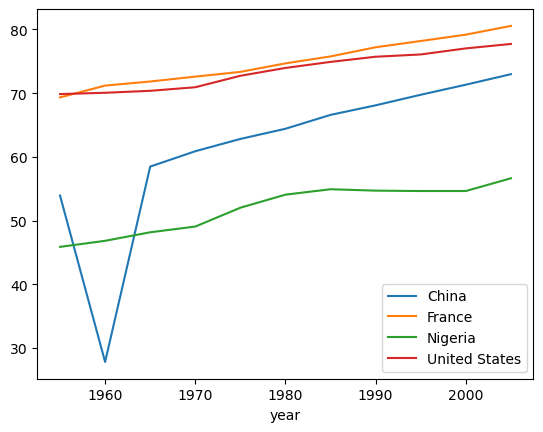

In [234]:
countries = ["United States", "China", "France", "Nigeria"]
line_df = pdf[pdf["country"].isin(countries)].set_index("year")
line_df.groupby("country")["life_expect"].plot()
plt.legend()

Another method to accomplish this is by pivoting the country column so it becomes four different columns which pandas plots as individual lines.

In [235]:
countries = ["United States", "China", "France", "Nigeria"]
line_df = pdf[pdf["country"].isin(countries)].pivot(
    index="year", columns="country", values="life_expect"
)

<Axes: xlabel='year'>

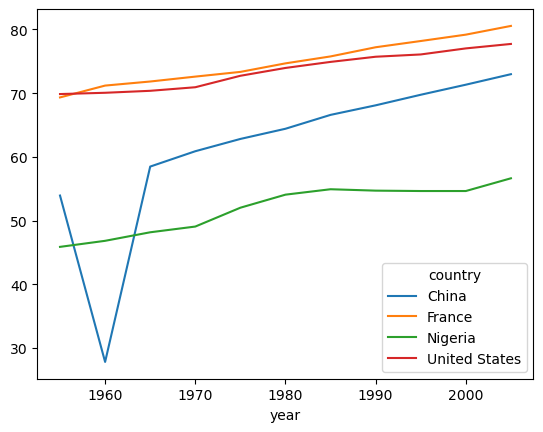

In [236]:
line_df.plot.line()

We are missing the ylabel here, but we can add it along with a title and capitalize year. This is done via keyword arguments to the plot call.

<Axes: title={'center': 'Life Expectancy in Countries'}, xlabel='Year', ylabel='Life Expectancy'>

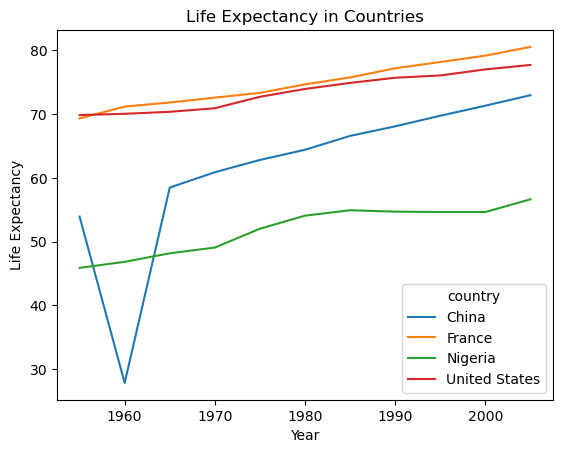

In [237]:
line_df.plot.line(
    ylabel="Life Expectancy", xlabel="Year", title="Life Expectancy in Countries"
)

<Axes: title={'center': 'Fertility vs Life Expectancy in 2005'}, xlabel='fertility', ylabel='life_expect'>

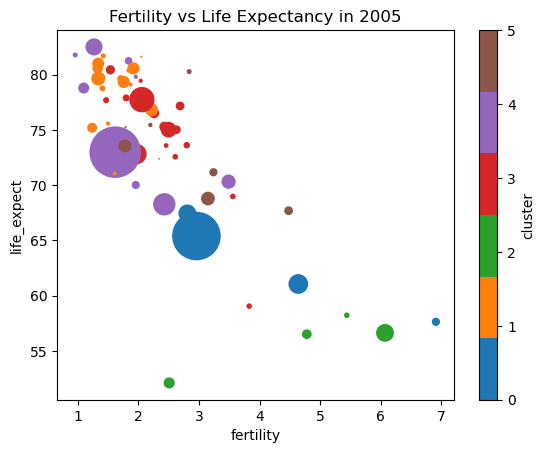

In [238]:
from matplotlib.colors import ListedColormap

scatter_cmap = ListedColormap(plt.colormaps["tab10"].colors, N=6)

df2005_scaled = pdf[pdf["year"] == 2005].assign(pop=lambda df: df["pop"] / 1e6)

df2005_scaled.plot.scatter(
    x="fertility",
    y="life_expect",
    c="cluster",
    s="pop",
    cmap=scatter_cmap,
    title="Fertility vs Life Expectancy in 2005",
)

For the bar chart, pandas automatically rotates the labels and includes a legend (which we can choose to supress). Other updates to the plot can still be accomplished through standard `plt` calls.

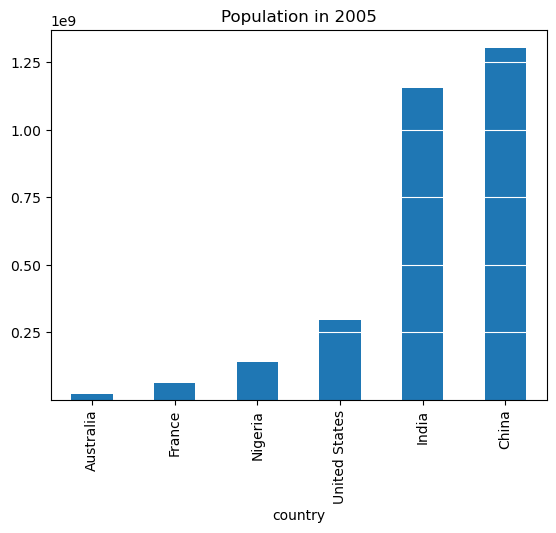

In [239]:
sorted_pdf = pdf[
    (pdf["year"] == 2005) & pdf["country"].isin(bar_countries)
].sort_values("pop")
sorted_pdf.plot.bar(x="country", y="pop", title="Population in 2005", legend=False)

plt.yticks([25e7, 50e7, 75e7, 100e7, 125e7])
plt.grid(axis="y", color="w")

## Choosing the Right Chart

As noted in the above example, a key challenge in visualization is finding the correct type of chart to use for a particular question about the data. There are guidelines that you can follow to select charts that can help in a particular situation. Before we examine the chart types, we need to understand the types of data attributes that are involved. These types relate to whether the data can be ordered and if so, whether those values can be compared arithmetically.

#### Data Attribute Types

- **Categorical** (aka Nominal): Attributes that represent different groups. Such attributes cannot be ordered in a meaningful way. Examples include produce types (apples, bananas, grapes) and eye color (blue, brown, green). We can tell if two data items have the same or different values for that attribute but we cannot say that one attribute is less than or greater than the other.
- **Ordinal**: Attributes that can be ordered in a meaningful way. Examples include clothing sizes (Small, Medium, Large) or customer satisfaction ratings (poor, fair, good, excellent). We can put data items in an order based on this attribute but need not be able to compute how much different two values are (small < medium but we don't know by how much).
- **Quantitative**: Attributes that are ordered and can be arithmetically compared. Here, we can measure how much smaller one value is than another or how many times larger a value is than another. Examples here include temperature readings (34.5, 54.1, 87.9) and dates (2020-03-04, 2022-05-06, 2024-07-04).

Note than a quantitative attribute is ordered and an ordered attribute could be treated categorically, but we cannot invert these relationships. Something that is strictly categorical is not ordered.

#### Chart Requirements

- **Line Chart**: A line chart requires a quantitative attribute and an ordered attribute. The connection between two points implies a trend between them, and this does not make sense for categorical values. For example, we don't talk about a trend from an apple to a banana.
- **Scatterplot**: A scatterplot requires two quantitative attributes. One value is mapped to the x-axis and the other to the y-axis. Scatterplots are useful to look for correlation (either positive or negative) between two quantiative attributes.
- **Bar Chart**: A bar chart requires a quantitative attribute and a categorical attribute. Since there is no connection between items, the categorical attribute is ok here where it wasn't for the line chart.
- **Pie Chart**: A pie chart also requires a quantitative attribute and a categorical attribute. Pie charts are more useful for showing part-of-whole relationships. For example, a pie chart could show the number of each type of fruit in a market. The size of the apple slice helps us understand how many apples there are out of the total number of fruit items.

## Excercises

Suppose you have the penguins dataset and wish to answer some questions about the data. Create visualizations that will help you answer the following questions. Remember to choose a chart type that works with the data attributes you need to examine.

1. Is there a correlation between beak length and beak depth?
2. Can we use beak length and beak depth to distinguish between the three different species of penguins?
3. What are the differences in the average body masses of each sex of penguin on each island?


In [240]:
import os
import json
from urllib.request import urlretrieve

url = "https://github.com/vega/vega-datasets/blob/main/data/penguins.json"
local_fname = "penguins.json"
if not os.path.exists(local_fname):
    urlretrieve(url, local_fname)


In [241]:
# if you would like to use the data as a bunch of lists
# without using pandas or polars

penguins_data = json.load(open("penguins.json"))
species, island, bill_length, bill_depth, flipper_length, body_mass, sex = zip(
    *[
        (
            d["Species"],
            d["Island"],
            d["Beak Length (mm)"],
            d["Beak Depth (mm)"],
            d["Flipper Length (mm)"],
            d["Body Mass (g)"],
            d["Sex"],
        )
        for d in penguins_data
    ]
)

In [242]:
# if you would like to use pandas

penguins_df = pd.read_json("penguins.json")

In [243]:
# if you would like to use polars

penguins_df = pl.read_json("penguins.json")

##### Solution 1

Scatterplots work well for correlation and both beak length and beak depth are quantitative.

Text(0, 0.5, 'Beak Depth')

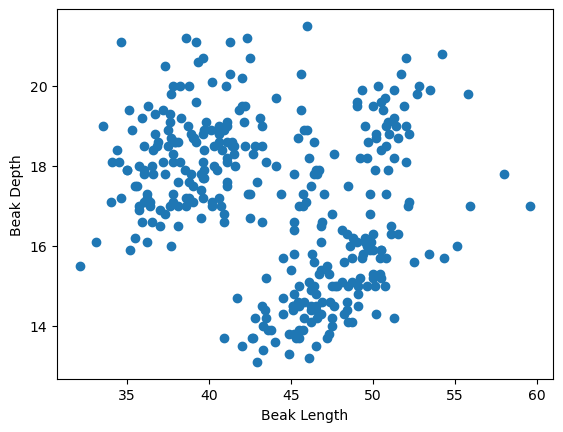

In [244]:
import matplotlib.pyplot as plt

plt.scatter("Beak Length (mm)", "Beak Depth (mm)", data=penguins_df)
plt.xlabel("Beak Length")
plt.ylabel("Beak Depth")

We can see that there is no noticeable positive or negative correlation between these measures.

##### Solution 2

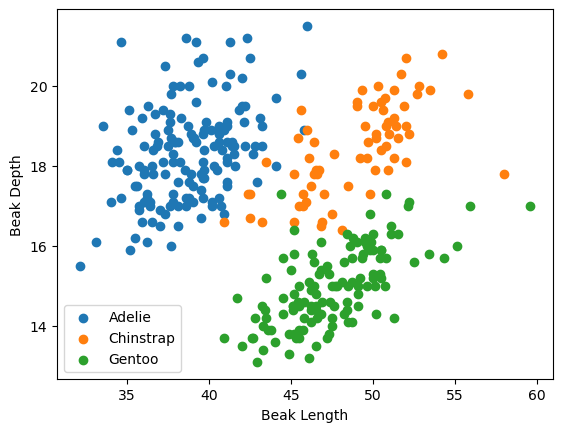

In [245]:
for species, gdf in penguins_df.group_by("Species"):
    plt.scatter("Beak Length (mm)", "Beak Depth (mm)", data=gdf, label=species[0])
plt.xlabel("Beak Length")
plt.ylabel("Beak Depth")
plt.legend()

We can see that these features do a pretty good job of defining three clusters, one for each species of penguin.

##### Solution 3

Both island and sex are categorical variables so we are left with bar charts and pie charts. A grouped bar chart would work well here as it allows comparisons across islands and sexes at the same time. 

In [246]:
mass = (
    penguins_df.filter(pl.col("Sex").is_in(["MALE", "FEMALE"]))
    .group_by("Island", "Sex")
    .agg(pl.col("Body Mass (g)").mean())
)

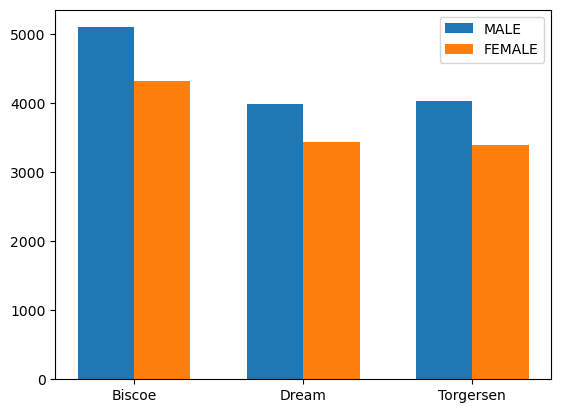

In [247]:
island_map = {
    n: i
    for (i, n) in enumerate(
        mass.select(pl.col("Island").unique().sort()).to_series().to_list()
    )
}
numbered = mass.with_columns(pl.col("Island").replace(island_map).cast(pl.Int32))
width = 1 / 3
for i, (sex, gdf) in enumerate(numbered.group_by("Sex")):
    shifted = gdf.with_columns(pl.col("Island") + (2 * i - 1) * width / 2)
    plt.bar("Island", "Body Mass (g)", data=shifted, width=width, label="Sex")

plt.xticks(list(island_map.values()), list(island_map.keys()))
handles = []
labels = []
for h, l in zip(*plt.gca().get_legend_handles_labels()):
    if l not in labels:
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels)


We can see that male penguins have more mass than female penguins on average, and that Biscoe tends to have larger penguins than the other two islands.